# Churn Prediciton

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
import os 

filename = 'Telco-Customer-Churn.csv'

if os.path.exists(filename):
    print("File already exists")
else:
    !wget $data -O $filename

File already exists


In [4]:
df = pd.read_csv(filename)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
categorical_columns = list(df.columns[df.dtypes == 'object'])

for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [8]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [9]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [10]:
# We notice that totalcharges is of type object instead of integer or floating point. Why is that?
# pd.to_numeric(df.totalcharges) 
# This error means that there were missing values in this column that were replace by '_', causing the dtype to change to object

In [11]:
# The 'coerce' option will cause the errors to be turned into Nans:
tc = pd.to_numeric(df.totalcharges, errors='coerce')
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [12]:
tc.isnull().sum()

np.int64(11)

In [13]:
print(tc.isnull()[:5])
# tc.isnull() is a list of true and false values that allows the indexing of the dataframe:
df[tc.isnull()][['customerid', 'totalcharges']]
# as we can see, for the customers shown in the dataframe, the totalcharges is missing

0    False
1    False
2    False
3    False
4    False
Name: totalcharges, dtype: bool


,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [14]:
# Now that we know why we got the error, let's apply these changes to the dataframe 
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [15]:
# We will fill these values with zeros which might not be the best approach, but in practice it might be okay!
df.totalcharges = df.totalcharges.fillna(0)

In [16]:
df.churn.head()
# The values are 'yes' and 'no'. We'd like to turn them into 0s and 1s

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [17]:
(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [18]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [19]:
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

### Setting Up Validation

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [23]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [24]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [27]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## EDA

In [28]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [29]:
df_full_train = df_full_train.reset_index(drop=True)

In [30]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [31]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [32]:
print(df_full_train.churn.value_counts())
print()
print(df_full_train.churn.value_counts(normalize=True))
# 0.27 is called the churn rate or the rate at which the users churn.

churn
0    4113
1    1521
Name: count, dtype: int64

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64


In [33]:
# The churn value can also be calculated as the mean of the churn column because it is a vector of 0s and 1s.
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [34]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [35]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [36]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [37]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
      'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [38]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Feature Importance

Churn rate

In [39]:
# Let's look at the churn rate within a specific category, e.g. gender
churn_female = df_full_train[df_full_train.gender == "female"].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [40]:
churn_male = df_full_train[df_full_train.gender == "male"].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [41]:
# Churn rate is not so different between genders
global_churn

np.float64(0.26996805111821087)

In [42]:
# Let's try it for the partner category
churn_w_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_w_partner

np.float64(0.20503330866025166)

In [43]:
churn_wo_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_wo_partner
# By comparing these values with global_churn, we see that those without a partner are more likely to churn.

np.float64(0.3298090040927694)

Risk ratio

In [44]:
churn_w_partner / global_churn

np.float64(0.7594724924338315)

In [45]:
churn_wo_partner / global_churn

np.float64(1.2216593879412643)

1. Difference:

Group - Global > 0 -> more likely to churn

Group - Global < 0 -> less likely to churn

2. Ratio

Group / Global > 1 -> more likely to churn

Group / Global < 1 -> less likely to churn

In [46]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [47]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [48]:
df_group['diff'] = df_group['mean'] - global_churn
df_group['ratio'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [49]:
from IPython.display import display

In [50]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['ratio'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,ratio
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,ratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,ratio
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,ratio
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,ratio
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,ratio
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,ratio
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,ratio
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,ratio
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,ratio
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,ratio
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,ratio
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,ratio
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,ratio
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


The churn ratio and difference is a good indicator of which group among each category is more likely to churn.

### Feature Importance: Mutual Information

With FI, one can tell which category is more important than the others based on a number assigned to them.

In [51]:
from sklearn.metrics import mutual_info_score 

In [52]:
mutual_info_score(df_full_train.churn, df_full_train.contract)
# This values tells us how much we know about churn by observing the values of contract, and the other way around.

np.float64(0.0983203874041556)

In [53]:
mutual_info_score(df_full_train.churn, df_full_train.gender)
# This small value tells us that gender does not tell us about the churn values at all!

np.float64(0.0001174846211139946)

In [54]:
for c in categorical:
    
    mi = mutual_info_score(df_full_train.churn, df_full_train[c])
    print(f"{c:<20} {mi:.6f}")

gender               0.000117
seniorcitizen        0.009410
partner              0.009968
dependents           0.012346
phoneservice         0.000229
multiplelines        0.000857
internetservice      0.055868
onlinesecurity       0.063085
onlinebackup         0.046923
deviceprotection     0.043453
techsupport          0.061032
streamingtv          0.031853
streamingmovies      0.031581
contract             0.098320
paperlessbilling     0.017589
paymentmethod        0.043210


In [55]:
# Another way of doing what is in the above so that it can be sorted:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series) 

In [56]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [57]:
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Feature Importance: Correlation

Correlation can take any value from -1 to 1.

If this number is closer to -1 for variables x and y, then increase in values of x lead to a decrease in the values of y.

If this number is closer to 1 for variables x and y, then increase in values of x lead to an increase in the values of y.

Low: if this number is less than |0.2|, then an increase in x rarely leads to an increase or decrease in the the values of y.

Moderate: if this number is less than |0.2| to |0.5|, then an increase in x sometimes leads to an increase or decrease in the the values of y.

Strong: if this number is less than |0.6| to |1|, then an increase in x almost always/often leads to an increase or decrease in the the values of y.

As an example:

x (Tenure) is a value between 0 to 72

y (churn) is either 0 or 1

If correlation is positive, then higher tenure leads to higher churn, and if negative the other way around. If this value is close to zero, then the tenure value does not affect churn at all.

In [58]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [59]:
df_full_train[df_full_train.tenure <= 2].churn.mean()
# the above correlation is confirmed here. Low tenure values have about 60% churn rate 

np.float64(0.5953420669577875)

In [60]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [61]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [62]:
print(df_full_train[df_full_train.monthlycharges <= 20].churn.mean())
print(df_full_train[df_full_train.monthlycharges > 50].churn.mean())
print(df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean())

0.08795411089866156
0.32499341585462205
0.18340943683409436


### One-hot Encoding

One-hot encoding is used to convert categorical variables (like 'red', 'blue', 'green') into a numerical format that machine learning models can understand.

In [63]:
from sklearn.feature_extraction import DictVectorizer

In [64]:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [65]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

In [66]:
dv = DictVectorizer()

In [67]:
# Learns what the data looks like (i.e., discovers the feature names and structure).
dv.fit(dicts)

DictVectorizer()

In [68]:
# Uses that learned structure to convert new data into numerical format.
dv.transform(dicts)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 200 stored elements and shape (100, 5)>

In [69]:
dv = DictVectorizer(sparse=False)

In [70]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [71]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [72]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

Now let's do the above for all our categorical features and add numerical features as well. DictVectorizer is smart enough to detect numerical features and add them as is.

In [73]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [74]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [75]:
dv = DictVectorizer(sparse=False)

In [76]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [77]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [78]:
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]], shape=(4225, 45))

In [79]:
list(dv.transform(train_dicts))[0]

array([0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03])

In [80]:
# fit and transform can be combined as follows:
X_train = dv.fit_transform(train_dicts)

In [81]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# Let's do the same for our validation data set:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
# We don't fit on the validation dataset, we only transform
X_val = dv.transform(val_dicts)

## Logistic Regression
Binary classification can be solved with logistic regression.

Logistic regression uses the sigmoid function to bring everything (the dot product plus the bias term) into the range of 0 to 1.

In [82]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) 

In [83]:
z = np.linspace(-5, 5, 51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [84]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

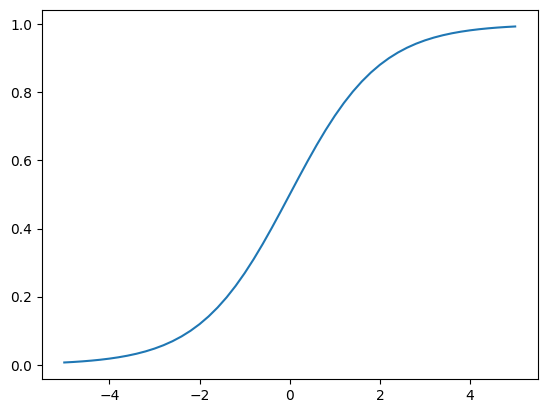

In [85]:
plt.plot(z, sigmoid(z))

In [86]:
def linear_regression(xi, w0, w):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [87]:
def logistic_regression(xi, w0, w):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result
# both linear and logistic regression models are called linear models becuase of the linear combination involved in them.

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
model = LogisticRegression(max_iter=4000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [90]:
model.coef_

array([[ 6.84563865e-01,  3.85627805e-02, -6.82106720e-01,
         5.59874182e-02, -1.49674921e-02,  1.13934134e-01,
        -1.59961569e-01,  8.70473614e-02,  3.94140853e-02,
         1.60584095e-03, -4.97473553e-01,  6.98455049e-01,
        -1.59961569e-01, -1.79930514e-02, -1.87166364e-01,
         6.61224966e-02,  1.62063794e-01,  1.16725547e-01,
        -1.59961569e-01,  8.42559483e-02,  2.85032504e-01,
        -1.59961569e-01, -8.40510084e-02, -1.61238079e-01,
         2.02258005e-01, -4.45575410e-02,  8.55774672e-02,
        -5.15350530e-02, -2.96985505e-03,  1.06354594e-01,
        -1.08297599e-02,  6.61224966e-02, -2.51025705e-02,
         1.93985926e-01, -9.41528635e-02, -1.59961569e-01,
         2.95134358e-01, -5.39335450e-02, -1.59961569e-01,
         2.54915040e-01,  2.35033033e-01, -1.59961569e-01,
        -3.40515382e-02, -6.85347146e-02,  3.95932211e-04]])

In [91]:
model.coef_[0]

array([ 6.84563865e-01,  3.85627805e-02, -6.82106720e-01,  5.59874182e-02,
       -1.49674921e-02,  1.13934134e-01, -1.59961569e-01,  8.70473614e-02,
        3.94140853e-02,  1.60584095e-03, -4.97473553e-01,  6.98455049e-01,
       -1.59961569e-01, -1.79930514e-02, -1.87166364e-01,  6.61224966e-02,
        1.62063794e-01,  1.16725547e-01, -1.59961569e-01,  8.42559483e-02,
        2.85032504e-01, -1.59961569e-01, -8.40510084e-02, -1.61238079e-01,
        2.02258005e-01, -4.45575410e-02,  8.55774672e-02, -5.15350530e-02,
       -2.96985505e-03,  1.06354594e-01, -1.08297599e-02,  6.61224966e-02,
       -2.51025705e-02,  1.93985926e-01, -9.41528635e-02, -1.59961569e-01,
        2.95134358e-01, -5.39335450e-02, -1.59961569e-01,  2.54915040e-01,
        2.35033033e-01, -1.59961569e-01, -3.40515382e-02, -6.85347146e-02,
        3.95932211e-04])

In [92]:
# Intercept is the same as bias
model.intercept_

array([-0.04532338])

In [93]:
# hard predictions: the output is just zeros and ones.
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [94]:
# soft prediction: includes the probability
model.predict_proba(X_train)
# The first column is the probability of the output being 0 and the second is the probability of the output being 1 (The probability of churning).

array([[0.92737411, 0.07262589],
       [0.32428383, 0.67571617],
       [0.36935502, 0.63064498],
       ...,
       [0.48795432, 0.51204568],
       [0.97453476, 0.02546524],
       [0.30652661, 0.69347339]], shape=(4225, 2))

In [95]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.0066238 , 0.20482253, 0.21781799, ..., 0.15149644, 0.78847856,
       0.81190391], shape=(1409,))

In [96]:
y_pred >= 0.5
# True means that we think the customer is churning. 

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [97]:
churn_decision = (y_pred >= 0.5)

In [98]:
# a list of customer IDs that we think they might churn
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 315, dtype: object

In [99]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [100]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [101]:
(y_val == churn_decision).mean()
# 80 percent of our predictions match with the correct label.

np.float64(0.8034066713981547)

In [102]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [103]:
df_pred

,probability,prediction,actual
0,0.006624,0,0
1,0.204823,0,0
2,0.217818,0,0
3,0.563750,1,1
4,0.218675,0,0
...,...,...,...
1404,0.291307,0,0
1405,0.041390,0,1
1406,0.151496,0,0
1407,0.788479,1,1


In [104]:
df_pred['correct'] = (df_pred['prediction'] == df_pred['probability'])
df_pred

,probability,prediction,actual,correct
0,0.006624,0,0,False
1,0.204823,0,0,False
2,0.217818,0,0,False
3,0.563750,1,1,False
4,0.218675,0,0,False
...,...,...,...,...
1404,0.291307,0,0,False
1405,0.041390,0,1,False
1406,0.151496,0,0,False
1407,0.788479,1,1,False


### Model Interpretation

In [106]:
model.coef_[0].round(3)

array([ 0.685,  0.039, -0.682,  0.056, -0.015,  0.114, -0.16 ,  0.087,
        0.039,  0.002, -0.497,  0.698, -0.16 , -0.018, -0.187,  0.066,
        0.162,  0.117, -0.16 ,  0.084,  0.285, -0.16 , -0.084, -0.161,
        0.202, -0.045,  0.086, -0.052, -0.003,  0.106, -0.011,  0.066,
       -0.025,  0.194, -0.094, -0.16 ,  0.295, -0.054, -0.16 ,  0.255,
        0.235, -0.16 , -0.034, -0.069,  0.   ])

In [109]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [118]:
# to list is used to avoid printing np.float() for the float values.
# zip is an iterator and to view its content dict() or list() should be used.
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3).tolist()))

{'contract=month-to-month': 0.685,
 'contract=one_year': 0.039,
 'contract=two_year': -0.682,
 'dependents=no': 0.056,
 'dependents=yes': -0.015,
 'deviceprotection=no': 0.114,
 'deviceprotection=no_internet_service': -0.16,
 'deviceprotection=yes': 0.087,
 'gender=female': 0.039,
 'gender=male': 0.002,
 'internetservice=dsl': -0.497,
 'internetservice=fiber_optic': 0.698,
 'internetservice=no': -0.16,
 'monthlycharges': -0.018,
 'multiplelines=no': -0.187,
 'multiplelines=no_phone_service': 0.066,
 'multiplelines=yes': 0.162,
 'onlinebackup=no': 0.117,
 'onlinebackup=no_internet_service': -0.16,
 'onlinebackup=yes': 0.084,
 'onlinesecurity=no': 0.285,
 'onlinesecurity=no_internet_service': -0.16,
 'onlinesecurity=yes': -0.084,
 'paperlessbilling=no': -0.161,
 'paperlessbilling=yes': 0.202,
 'partner=no': -0.045,
 'partner=yes': 0.086,
 'paymentmethod=bank_transfer_(automatic)': -0.052,
 'paymentmethod=credit_card_(automatic)': -0.003,
 'paymentmethod=electronic_check': 0.106,
 'paymen

In [119]:
small = ['contract', 'tenure', 'monthlycharges']

In [120]:
df_train[small]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
...,...,...,...
4220,one_year,52,80.85
4221,month-to-month,18,25.15
4222,month-to-month,2,90.00
4223,two_year,27,24.50


In [124]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [123]:
dicts_train_small[:10]

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [129]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [130]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [131]:
X_train_small = dv_small.transform(dicts_train_small)

In [132]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [133]:
model_small.intercept_[0]

np.float64(-2.477957595829565)

In [134]:
model_small.coef_[0]

array([ 0.9711394 , -0.02379507, -0.94828863,  0.02748534, -0.03619005])

In [137]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3).tolist()))

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}